In [90]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

def newSort(X,k=0):
    """Given an unsorted list of integers, X,
        sort list and return sorted list
    """

    n = len(X)
    if n==1:
        return X
    elif n<=k:
        for i in range(n-1):
            ind_min = i
            for j in range(i+1,n):
                if X[j]<X[ind_min]:
                    ind_min = j
            X[i],X[ind_min] = X[ind_min],X[i]
        return X
    else:
        L = newSort(X[:n//2],k)
        R = newSort(X[n//2:],k)
        return merge(L,R)


def merge(L,R):
    """Merge 2 sorted lists provided as input
    into a single sorted list
    """
    M = [] #Merged list, initially empty
    indL,indR = 0,0 #start indices
    nL,nR = len(L),len(R)

    #Add one element to M per iteration until an entire sublist
    #has been added
    for i in range(nL+nR):
        if L[indL]<R[indR]:
            M.append(L[indL])
            indL = indL + 1
            if indL>=nL:
                M.extend(R[indR:])
                break
        else:
            M.append(R[indR])
            indR = indR + 1
            if indR>=nR:
                M.extend(L[indL:])
                break
    return M


def time_newSort(inputs=None):
    """Analyze performance of newSort
    Use variables inputs and outputs if/as needed
    """
    random = []
    worst = []
    best = []

    #average case scenario input
    for k in range(10):
        for i in range(6):
            N = 10**i
            X = list(np.random.randint(1, 2 * N, N))
            t1 = time.time()
            y = newSort(X,k)
            t2 = time.time()
            random.append((N,t2-t1))

        
    #worst case scenario input
    for k in range(10):
        for i in range(6):
            N = 10**i
            X = list(range(N,0,-1))
            t1 = time.time()
            y = newSort(X,k)
            t2 = time.time()
            worst.append((N,t2-t1))

    #best case scenario input
    for k in range(10):
        for i in range(6):
            N = 10**i
            X = list(range(N))
            t1 = time.time()
            y = newSort(X,k)
            t2 = time.time()
            best.append((N,t2-t1))
            
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_yscale('log')
    for i in range(len(worst)):
        w = worst[6*i:6*(i+1)]
        ax.plot(*zip(*w),label = '{i}'.format(i=i))
    ax.set_xlabel('N')
    ax.set_ylabel('Time')
    plt.title('Plot of size of list against time, for $n \leq k$, $k$ varied: Worst Case')
    plt.legend(loc = 'best')

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_yscale('log')
    for i in range(len(random)):
        r = random[6*i:6*(i+1)]
        ax.plot(*zip(*r),label = '{i}'.format(i=i))
    ax.set_xlabel('N')
    ax.set_ylabel('Time')
    plt.title('Plot of size of list against time, for $n \leq k$, $k$ varied: Average Case')
    plt.legend(loc = 'best')

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_yscale('log')
    for i in range(len(best)):
        b = best[6*i:6*(i+1)]
        ax.plot(*zip(*b),label = '{i}'.format(i=i))
    ax.set_xlabel('N')
    ax.set_ylabel('Time')
    plt.title('Plot of size of list against time, for $n \leq k$, $k$ varied: Best Case')
    plt.legend(loc = 'best')
    
    random2 = []
    worst2 = []
    best2 = []

    #average case scenario input
    for k in range(10**5,10**5+10):
        for i in range(4):
            N = 10**i
            X = list(np.random.randint(1, 2 * N, N))
            t1 = time.time()
            y = newSort(X,k)
            t2 = time.time()
            random2.append((N,t2-t1))

        
    #worst case scenario input
    for k in range(10**5,10**5+10):
        for i in range(4):
            N = 10**i
            X = list(range(N,0,-1))
            t1 = time.time()
            y = newSort(X,k)
            t2 = time.time()
            worst2.append((N,t2-t1))

    #best case scenario input
    for k in range(10**5,10**5+10):
        for i in range(4):
            N = 10**i
            X = list(range(N))
            t1 = time.time()
            y = newSort(X,k)
            t2 = time.time()
            best2.append((N,t2-t1))
        
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_yscale('log')
    for i in range(len(worst2)):
        w2 = worst2[4*i:4*(i+1)]
        ax.plot(*zip(*w2),label = '{i}'.format(i=10**5 + i))
    ax.set_xlabel('N')
    ax.set_ylabel('Time')
    plt.title('Plot of size of list against time, for $n > k$, $k$ varied: Worst Case')
    plt.legend(loc = 'best')

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_yscale('log')
    for i in range(len(random2)):
        r2 = random2[4*i:4*(i+1)]
        ax.plot(*zip(*r2),label = '{i}'.format(i=10**5 + i))
    ax.set_xlabel('N')
    ax.set_ylabel('Time')
    plt.title('Plot of size of list against time, for $n > k$, $k$ varied: Average Case')
    plt.legend(loc = 'best')

    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.set_yscale('log')
    for i in range(len(best2)):
        b2 = best2[4*i:4*(i+1)]
        ax.plot(*zip(*b2),label = '{i}'.format(i=10**5 + i))
    ax.set_xlabel('N')
    ax.set_ylabel('Time')
    plt.title('Plot of size of list against time, for $n > k$, $k$ varied: Best Case')
    plt.legend(loc = 'best')

NameError: name 'outputs' is not defined

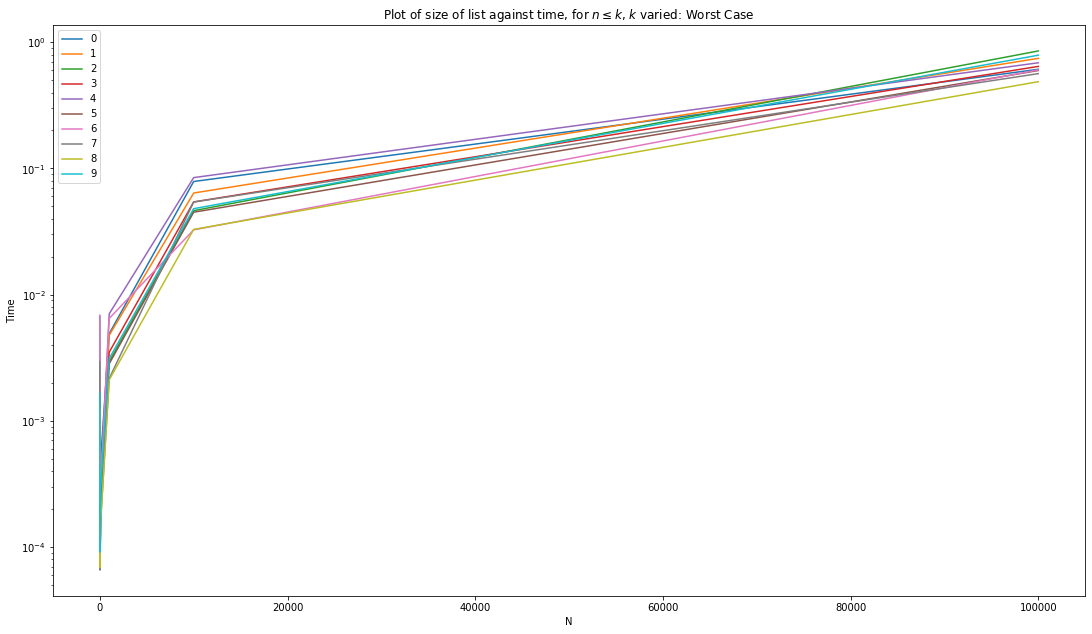

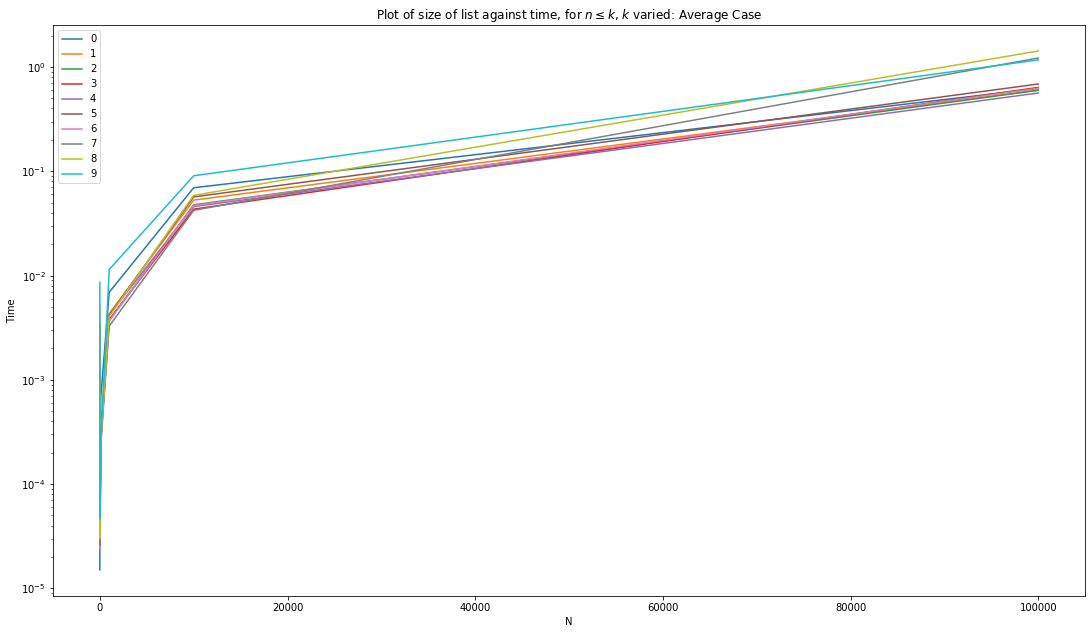

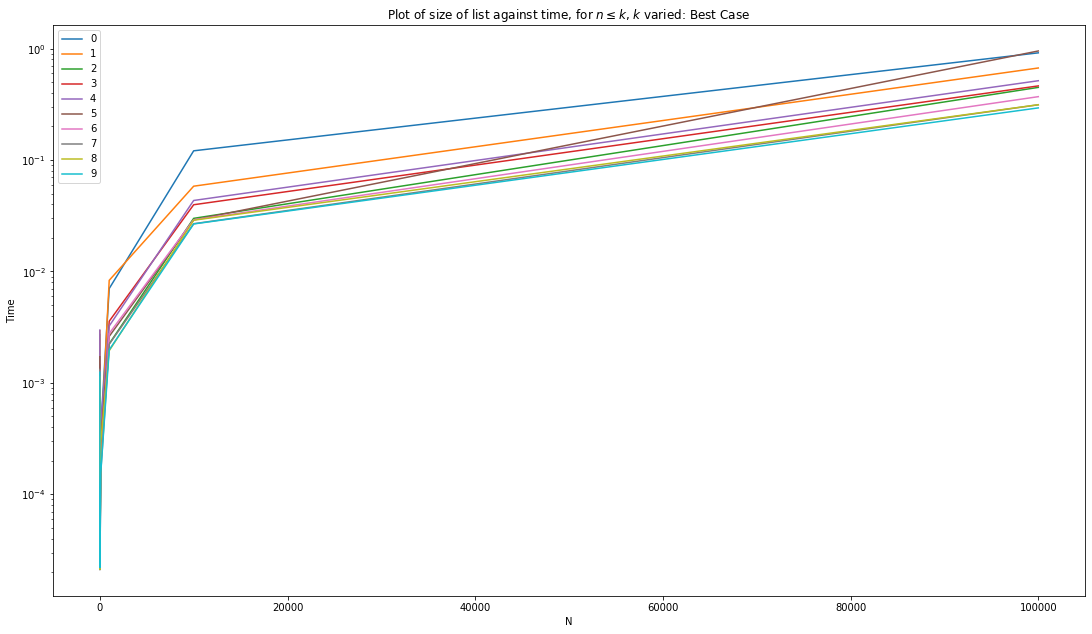

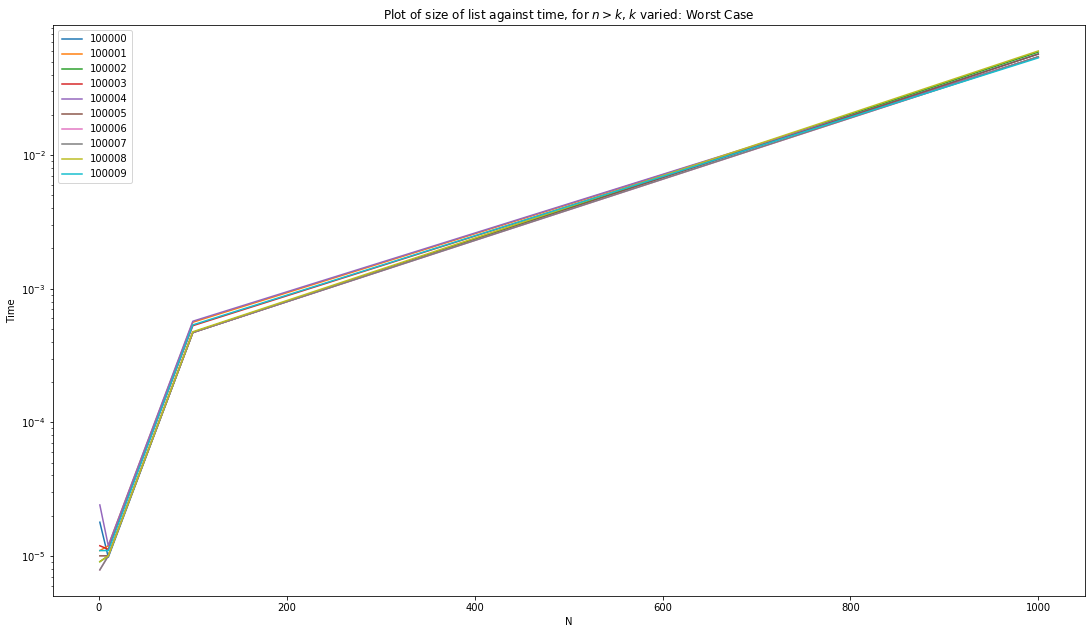

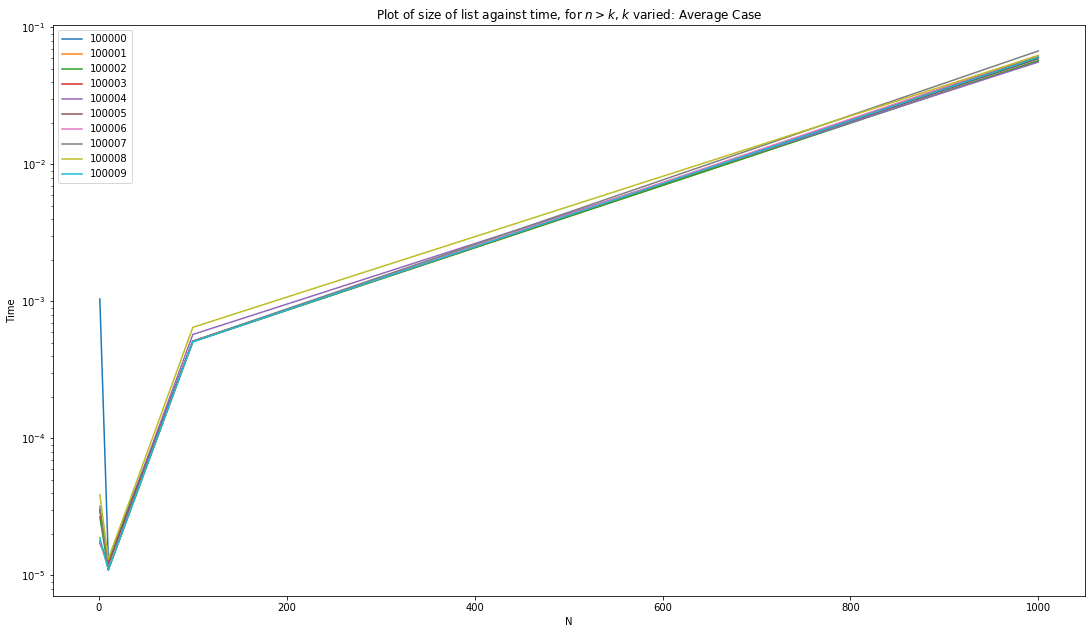

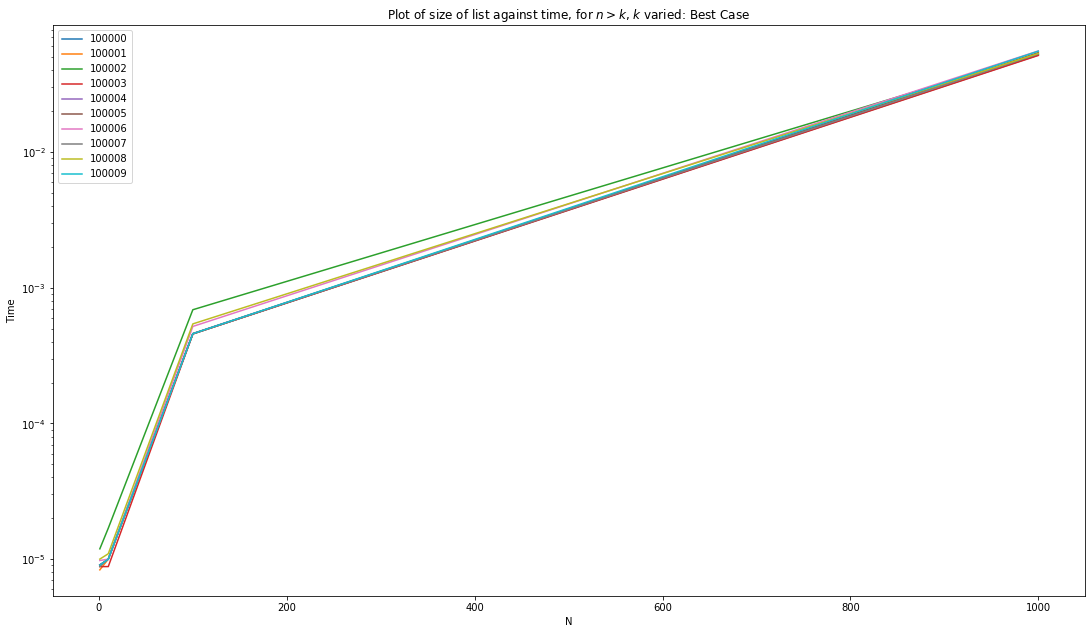

In [91]:
time_newSort()

In [65]:
N = 100
X = list(np.random.randint(1, 2 * N, N))
for j in range(100):
    for k in range(100,200):
        L = newSort(X)
        if not all(L[i] <= L[i+1] for i in range(len(l)-1)):
            print('1')


In [66]:
import time

In [83]:
random = []
worst = []
best = []

#average case scenario input
for k in range(10):
    for i in range(6):
        N = 10**i
        X = list(np.random.randint(1, 2 * N, N))
        t1 = time.time()
        y = newSort(X,k)
        t2 = time.time()
        random.append((N,t2-t1))

        
#worst case scenario input
for k in range(10):
    for i in range(6):
        N = 10**i
        X = list(range(N,0,-1))
        t1 = time.time()
        y = newSort(X,k)
        t2 = time.time()
        worst.append((N,t2-t1))

#best case scenario input
for k in range(10):
    for i in range(6):
        N = 10**i
        X = list(range(N))
        t1 = time.time()
        y = newSort(X,k)
        t2 = time.time()
        best.append((N,t2-t1))
        


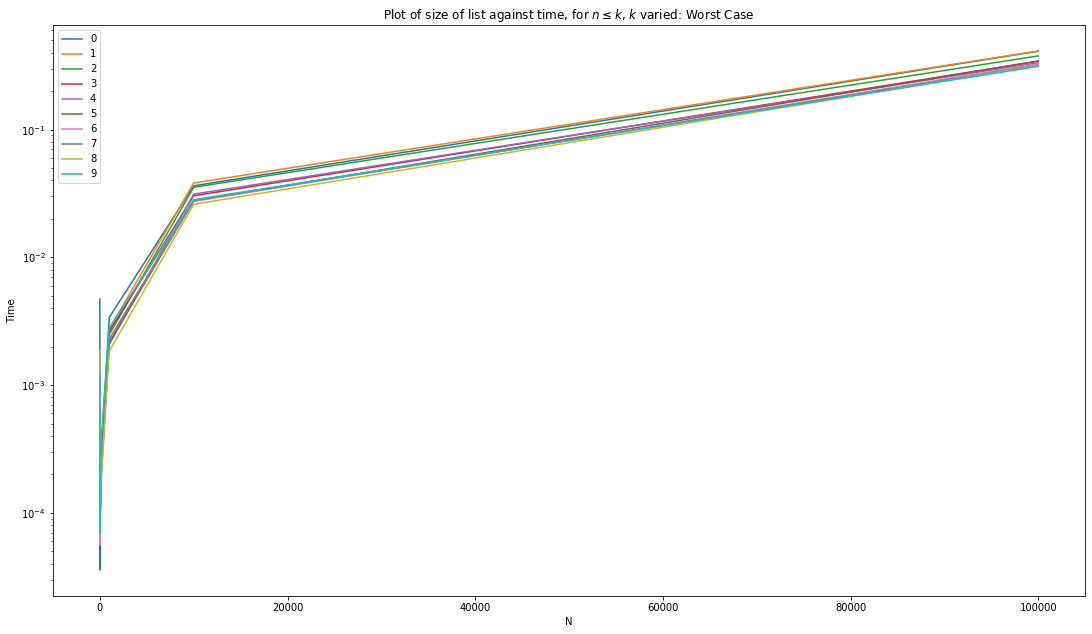

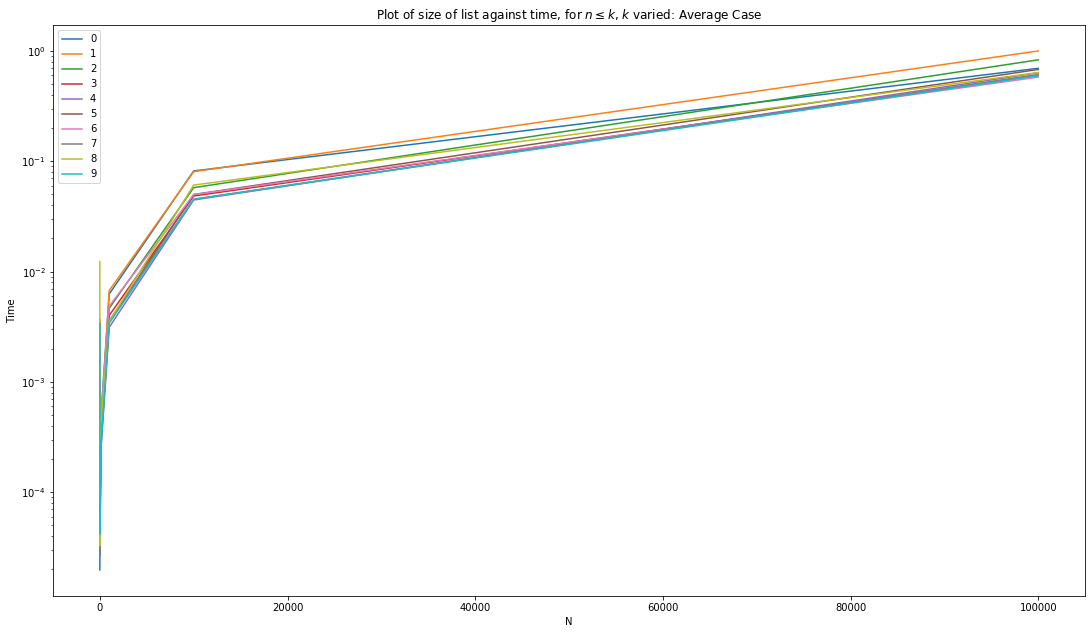

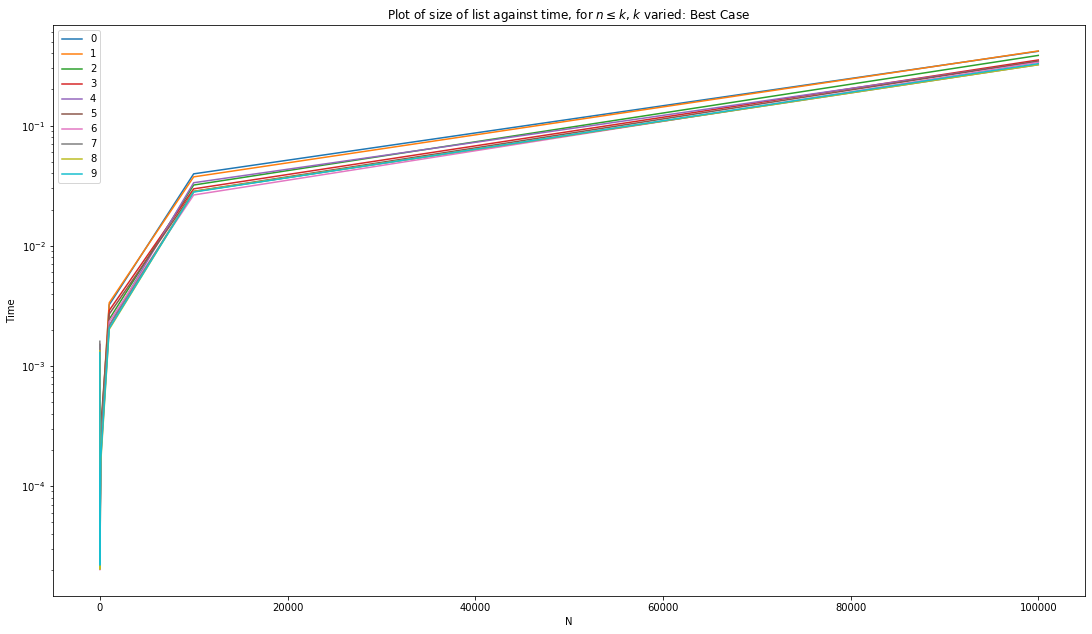

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yscale('log')
for i in range(len(worst)):
    w = worst[6*i:6*(i+1)]
    ax.plot(*zip(*w),label = '{i}'.format(i=i))
ax.set_xlabel('N')
ax.set_ylabel('Time')
plt.title('Plot of size of list against time, for $n \leq k$, $k$ varied: Worst Case')
plt.legend(loc = 'best')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yscale('log')
for i in range(len(random)):
    r = random[6*i:6*(i+1)]
    ax.plot(*zip(*r),label = '{i}'.format(i=i))
ax.set_xlabel('N')
ax.set_ylabel('Time')
plt.title('Plot of size of list against time, for $n \leq k$, $k$ varied: Average Case')
plt.legend(loc = 'best')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yscale('log')
for i in range(len(best)):
    b = best[6*i:6*(i+1)]
    ax.plot(*zip(*b),label = '{i}'.format(i=i))
ax.set_xlabel('N')
ax.set_ylabel('Time')
plt.title('Plot of size of list against time, for $n \leq k$, $k$ varied: Best Case')
plt.legend(loc = 'best')

In [85]:
random2 = []
worst2 = []
best2 = []

#average case scenario input
for k in range(10**5,10**5+10):
    for i in range(4):
        N = 10**i
        X = list(np.random.randint(1, 2 * N, N))
        t1 = time.time()
        y = newSort(X,k)
        t2 = time.time()
        random2.append((N,t2-t1))

        
#worst case scenario input
for k in range(10**5,10**5+10):
    for i in range(4):
        N = 10**i
        X = list(range(N,0,-1))
        t1 = time.time()
        y = newSort(X,k)
        t2 = time.time()
        worst2.append((N,t2-t1))

#best case scenario input
for k in range(10**5,10**5+10):
    for i in range(4):
        N = 10**i
        X = list(range(N))
        t1 = time.time()
        y = newSort(X,k)
        t2 = time.time()
        best2.append((N,t2-t1))

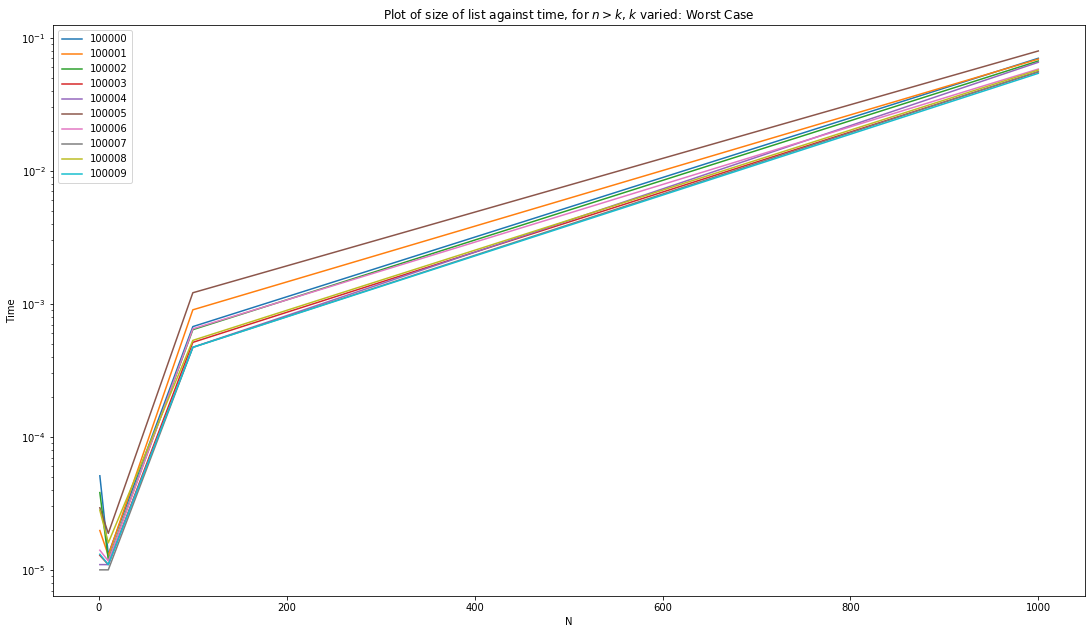

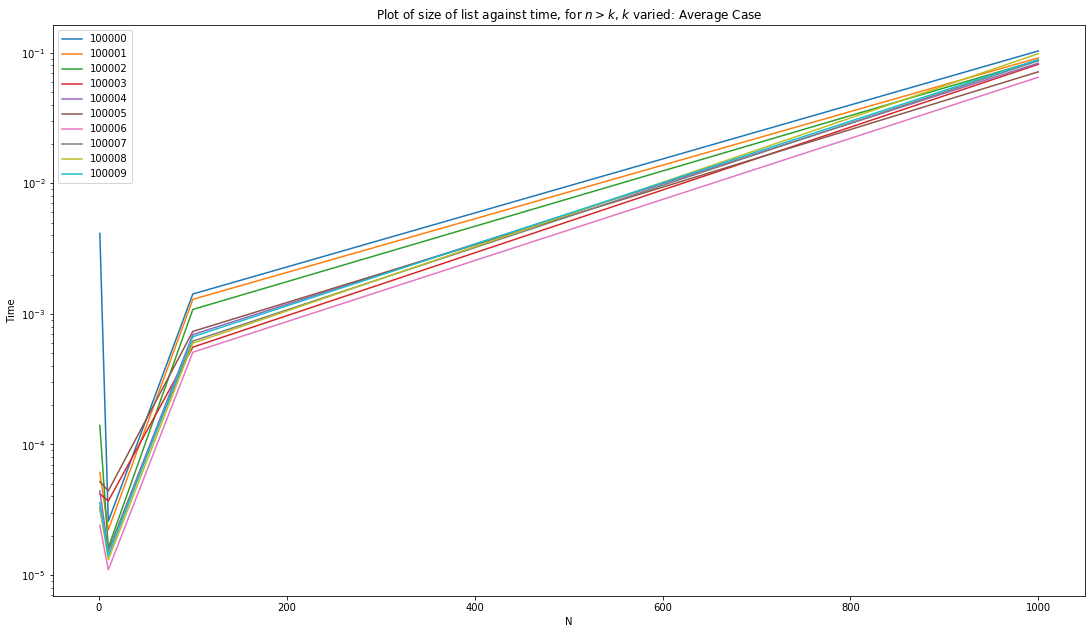

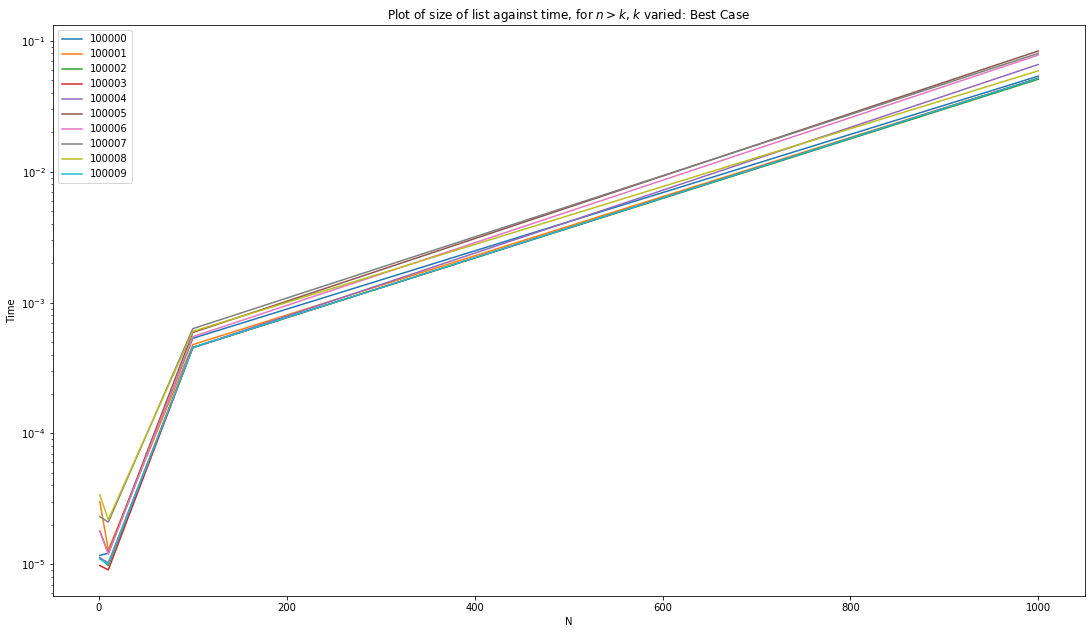

In [88]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yscale('log')
for i in range(len(worst2)):
    w2 = worst2[4*i:4*(i+1)]
    ax.plot(*zip(*w2),label = '{i}'.format(i=10**5 + i))
ax.set_xlabel('N')
ax.set_ylabel('Time')
plt.title('Plot of size of list against time, for $n > k$, $k$ varied: Worst Case')
plt.legend(loc = 'best')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yscale('log')
for i in range(len(random2)):
    r2 = random2[4*i:4*(i+1)]
    ax.plot(*zip(*r2),label = '{i}'.format(i=10**5 + i))
ax.set_xlabel('N')
ax.set_ylabel('Time')
plt.title('Plot of size of list against time, for $n > k$, $k$ varied: Average Case')
plt.legend(loc = 'best')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_yscale('log')
for i in range(len(best2)):
    b2 = best2[4*i:4*(i+1)]
    ax.plot(*zip(*b2),label = '{i}'.format(i=10**5 + i))
ax.set_xlabel('N')
ax.set_ylabel('Time')
plt.title('Plot of size of list against time, for $n > k$, $k$ varied: Best Case')
plt.legend(loc = 'best')

In [ ]:
def findTrough1(L):
    i = []
    for j in range(1,len(L)-1):
        if L[j-1] >= L[j] and L[j] <= L[j+1]:
            i.append(j)
    if L[0] <= L[1]:
        i.append(0)
    if L[len(L)-1] <= L[len(L)-2]:
        i.append(len(L)-1)
    if len(i) == 0:
        return -(len(L)+1)
    else:
        return i

# it turns out there are a finite number of cases for a list of ints to follow
#1. -x^2
#2. monotone inc
#3. constant
#4. monotone dec.
#5. x^2
# in all the cases, it simply suffices to check the endpoints to find just one trough.


def findTrough(L):
    """Find and return a location of a trough in L
    """
    if L[0] <= L[1]:
        return 0
    elif L[len(L)-1] <= L[len(L)-2]:
        return len(L)-1
    else:
        for j in range(1,len(L)):
            if L[j-1] >= L[j] <= L[j+1]:
                return j
        else:
            return -(len(L)+1)

In [ ]:
L = [6,4,3,2,6]
findTrough(L)

In [ ]:
range(1,len(L)-1)

In [ ]:
L[len(L)-2]